[목표]
- MNIST를 regression model이 아닌 classification model로 구현
- train과 test data에 대한 모델의 정확도를 plot하여 generalization error 확인

In [8]:
import torch
import torchvision
import torchvision.transforms as transforms

In [9]:
import numpy as np
import matplotlib.pyplot as plt


def accuracy(model, dataloader):
  cnt = 0
  acc = 0

  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    preds = torch.argmax(preds, dim=-1)

    cnt += labels.shape[0]
    acc += (labels == preds).sum().item()

  return acc / cnt


def plot_acc(train_accs, test_accs):
  x = np.arange(len(train_accs))

  plt.plot(x, train_accs, label='train')
  plt.plot(x, test_accs, label='test')
  plt.legend()
  plt.show()

In [10]:
transform = transforms.ToTensor()

trainset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)
testset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)


In [11]:
batch_size = 256

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True
)
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False
)

In [12]:
from torch import nn

class Model(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)

    self.act = nn.ReLU()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.act(self.layer3(x))

    return x

model = Model(28 * 28 * 1, 1024)

In [13]:
from torch.optim import SGD

lr = 0.001
model = model.to('cuda')

optimizer = SGD(model.parameters(), lr=lr)

Epoch   0 | Loss: 539.607227563858
Epoch   1 | Loss: 536.4099950790405
Epoch   2 | Loss: 533.0538001060486
Epoch   3 | Loss: 529.5960683822632
Epoch   4 | Loss: 525.9236710071564
Epoch   5 | Loss: 521.935920715332
Epoch   6 | Loss: 517.4248716831207
Epoch   7 | Loss: 511.90337777137756
Epoch   8 | Loss: 505.74601316452026
Epoch   9 | Loss: 498.86534786224365
Epoch  10 | Loss: 491.05374002456665
Epoch  11 | Loss: 482.2301924228668
Epoch  12 | Loss: 472.27636778354645
Epoch  13 | Loss: 461.06576704978943
Epoch  14 | Loss: 448.38495552539825
Epoch  15 | Loss: 434.357826590538
Epoch  16 | Loss: 418.94005620479584
Epoch  17 | Loss: 402.3232372999191
Epoch  18 | Loss: 384.6050908565521
Epoch  19 | Loss: 366.0607326030731
Epoch  20 | Loss: 347.0223751068115
Epoch  21 | Loss: 328.03164887428284
Epoch  22 | Loss: 309.4143319129944
Epoch  23 | Loss: 291.5422555208206
Epoch  24 | Loss: 274.7951706647873
Epoch  25 | Loss: 259.25299924612045
Epoch  26 | Loss: 245.11719316244125
Epoch  27 | Loss: 23

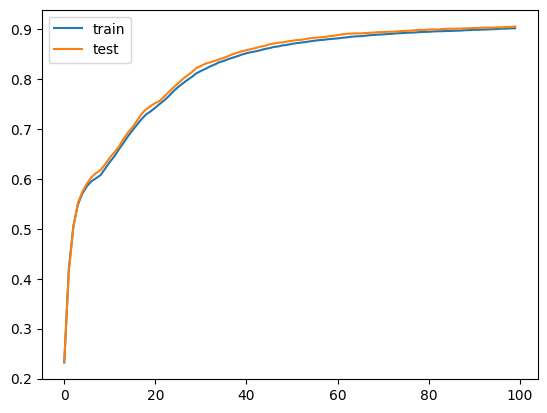

In [14]:
n_epochs = 100
loss_fn = nn.CrossEntropyLoss()
train_accs = []
test_accs = []

for epoch in range(n_epochs):
  total_loss = 0.
  for data in trainloader:
    model.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    loss = loss_fn(preds, labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()
  train_accs.append(accuracy(model, trainloader))
  test_accs.append(accuracy(model, testloader))

  print(f"Epoch {epoch:3d} | Loss: {total_loss}")

plot_acc(train_accs, test_accs)
